In [1]:
import numpy as np
import matplotlib.pyplot as plt

GOAL = 100
p = 0.4
gamma = 1.0
theta = 1e-9

In [2]:
V = np.zeros(GOAL + 1)
V[GOAL] = 1.0 

In [3]:
def value_iteration():
    global V
    deltas = []

    while True:
        delta = 0

        for s in range(1, GOAL):
            old_v = V[s]

            # possible stakes
            actions = range(1, min(s, GOAL - s) + 1)

            # compute action values
            action_values = [p * V[s + a] + (1 - p) * V[s - a] for a in actions]

            V[s] = max(action_values)

            delta = max(delta, abs(old_v - V[s]))

        deltas.append(delta)

        if delta < theta:
            break

    return deltas

In [4]:
deltas = value_iteration()

In [5]:
policy = np.zeros(GOAL + 1)

for s in range(1, GOAL):
    actions = range(1, min(s, GOAL - s) + 1)

    action_values = [p * V[s + a] + (1 - p) * V[s - a] for a in actions]

    best_action = actions[np.argmax(action_values)]
    policy[s] = best_action

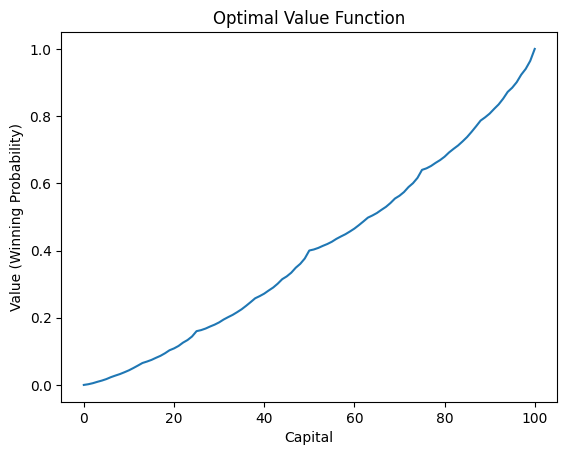

In [6]:
plt.figure()
plt.plot(V)
plt.xlabel("Capital")
plt.ylabel("Value (Winning Probability)")
plt.title("Optimal Value Function")
plt.show()

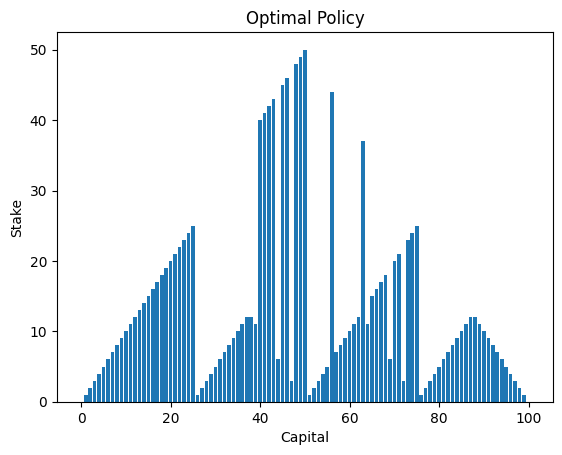

In [7]:
plt.figure()
plt.bar(range(GOAL + 1), policy)
plt.xlabel("Capital")
plt.ylabel("Stake")
plt.title("Optimal Policy")
plt.show()

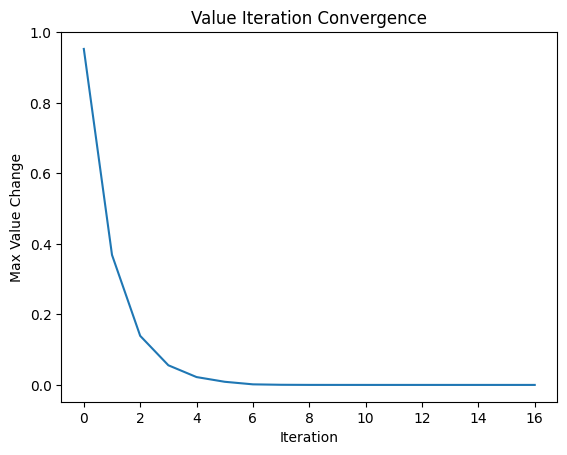

In [8]:
plt.figure()
plt.plot(deltas)
plt.xlabel("Iteration")
plt.ylabel("Max Value Change")
plt.title("Value Iteration Convergence")
plt.show()